In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image

# seabornb
import seaborn as sns

In [64]:
sns.__version__

'0.13.2'

In [65]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [66]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [67]:
# 데이터 준비

In [68]:

df_tips = sns.load_dataset("tips")
# 컬럼 이름 변경하고 파일로 저장하기
df_tips = df_tips.rename(columns={"sex": "gender"})
import os
path = "datas"
if not os.path.exists(path):
    os.mkdir(path)
df_tips.to_csv(f"{path}/sns_tips.csv", index=False)
file_path = "datas/sns_tips.csv"
df_tips = pd.read_csv(file_path)
df_tips.head()
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# 레이블 인코딩
- 범주형 데이터를 숫자로 변경
- 상관계수 계산시에는 숫자만 계산이 됨
- 머신러닝이 

In [69]:
df_tips.select_dtypes(include='object').columns

Index(['gender', 'smoker', 'day', 'time'], dtype='object')

In [70]:
df_tips['gender'].value_counts().sort_index()

gender
Female     87
Male      157
Name: count, dtype: int64

In [71]:
gen_map = {
    'Female' : 0,
    'Male' : 1}

In [72]:
df_tips['smoker'].value_counts().sort_index()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [73]:
smo_map = {'Yes':1,'No':0}

In [74]:
df_tips['day'].value_counts().sort_index()

day
Fri     19
Sat     87
Sun     76
Thur    62
Name: count, dtype: int64

In [75]:
# day 컬럼 mapping 코드 만들기
day_map={
    'Fri': 0,
    'Thur': 1,
    'Sat': 2,
    'Sun': 3
}

In [76]:
df_tips['time'].value_counts().sort_index()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [77]:
time_map={
    'Dinner': 0,
    'Lunch': 1
}

In [78]:
# 범주형 데이터인 'gender', 'smoker', 'day', 'time' 열에 레이블 인코딩 적용
df_tips['gender'] = df_tips['gender'].map(gen_map)
df_tips['smoker'] =  df_tips['smoker'].map(smo_map)
df_tips['day'] = df_tips['day'].map(day_map)
df_tips['time'] = df_tips['time'].map(time_map)

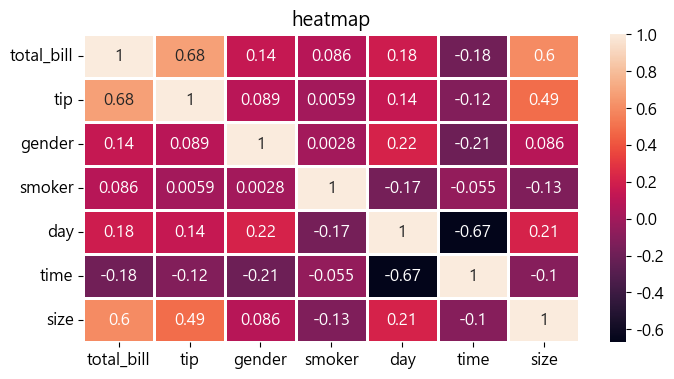

In [99]:
plt.title('heatmap')
sns.heatmap(df_tips.corr(), annot=True, linewidths=1)
plt.show()

<Axes: title={'center': 'heatmap'}>

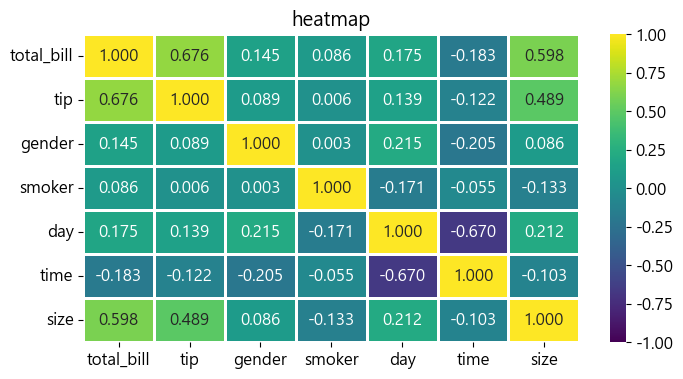

In [115]:
plt.title('heatmap')
sns.heatmap(df_tips.corr(),
            annot=True,
            fmt='.3f',
           cmap='viridis',
           linewidths=1,
           linecolor='white',
           cbar=True,
           vmin=-1,
           vmax=1)

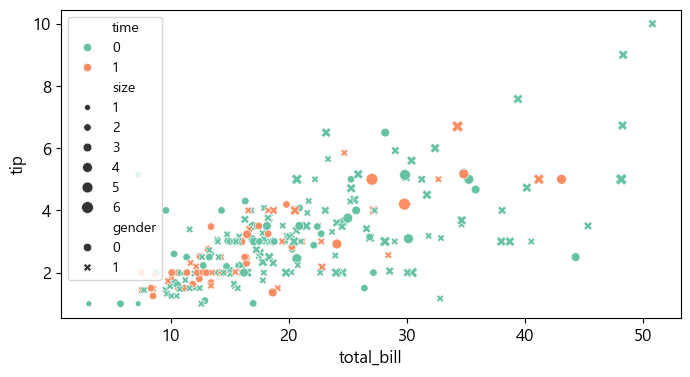

In [119]:
# Scatter plot : 
sns.scatterplot(data=df_tips, 
                x="total_bill", y="tip", 
                hue="time", 
                style="gender", 
                size="size", 
                palette="Set2")

# legend 사이즈
plt.legend(prop={'size': 10})
# Display the plot
plt.show()

In [120]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
subject = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
score1 = [66, 80, 60, 50, 80, 10]
score2 = [55, 90, 40, 60, 70, 20]

# subject 갯수 만큼 숫자리스트 생성(0~5)
sj_num = np.arange(len(subject))
sj_num

array([0, 1, 2, 3, 4, 5])

In [124]:
sj_num-0.4/2

array([-0.2,  0.8,  1.8,  2.8,  3.8,  4.8])

In [126]:
width = 0.4
sj_num + width/2

array([0.2, 1.2, 2.2, 3.2, 4.2, 5.2])

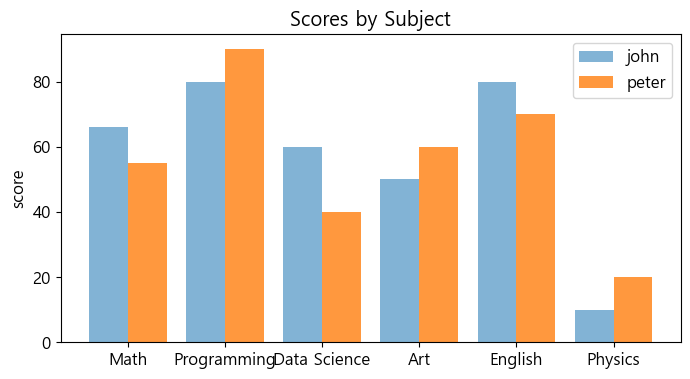

In [146]:
width = 0.4
fig, axes = plt.subplots()

# 막대 그래프를 생성하는 역할
# axes.bar(x좌표, height, width=0.8, bottom=None, align='center', **kwargs)
axes.bar(sj_num - width/2, score1, width, align='center', alpha=0.5)
axes.bar(sj_num + width/2, score2, width, align='center', alpha=0.8)

# xtick 설정
axes.set_xticks(sj_num)
axes.set_xticklabels(subject)

plt.ylabel('score')
plt.title('Scores by Subject')

plt.xticks(rotation=0)
plt.legend(['john', 'peter'])

plt.show()